<a href="https://colab.research.google.com/github/radziot/data-science-bootcamp/blob/main/02_analiza_danych/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Pandas
>Strona biblioteki: [https://pandas.pydata.org/](https://pandas.pydata.org/)  
>Dokumentacja: [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)
>
>Podstawowa biblioteka do analizy danych w języku Python.
>
>Aby zainstalować bibliotekę Pandas użyj polecenia poniżej:
```
pip install pandas
```
### Spis treści:
1. [Import Bibliotek](#a1)
2. [Załadowanie danych](#a2)
3. [Eksploracja danych](#a3)
4. [Selekcja kolumn](#a4)
5. [Selekcja wierszy](#a5)
6. [Obliczanie nowych kolumn](#a6)
7. [Filtrowanie danych](#a7)










### <a name='a1'></a> Import Bibliotek

In [29]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.25.2
Pandas: 2.0.3


### <a name='a2'></a> Załadowanie danych

In [30]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2024-05-23 to 2019-05-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


### <a name='a3'></a> Eksploracja danych

In [31]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2024-05-23,183.6600,184.7600,180.0800,181.0500,33670173
2024-05-22,183.8800,185.2200,181.9715,183.1300,28148784
2024-05-21,182.3000,183.2600,180.7500,183.1500,50839129
2024-05-20,184.3400,186.6650,183.2800,183.5400,30511768
2024-05-17,183.7600,185.3000,183.3500,184.7000,33175655
...,...,...,...,...,...
2019-06-03,88.0005,88.3145,83.6000,84.6345,181974160
2019-05-31,89.5005,89.7795,88.6350,88.7535,92376380
2019-05-30,91.2745,91.4735,90.3915,90.8160,62937000


In [32]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-05-23,183.66,184.760,180.0800,181.05,33670173
2024-05-22,183.88,185.220,181.9715,183.13,28148784
2024-05-21,182.30,183.260,180.7500,183.15,50839129
2024-05-20,184.34,186.665,183.2800,183.54,30511768
2024-05-17,183.76,185.300,183.3500,184.70,33175655


In [33]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2024-05-23,183.66,184.76,180.0800,181.05,33670173
2024-05-22,183.88,185.22,181.9715,183.13,28148784
2024-05-21,182.30,183.26,180.7500,183.15,50839129


In [34]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2019-06-03,88.0005,88.3145,83.6000,84.6345,181974160
2019-05-31,89.5005,89.7795,88.6350,88.7535,92376380
2019-05-30,91.2745,91.4735,90.3915,90.8160,62937000
2019-05-29,91.1560,91.5000,90.3765,90.9595,85580500
2019-05-28,91.6375,92.4635,91.3675,91.8215,63999300


In [35]:
df.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2019-06-10,91.1000,94.2435,90.9000,93.0315,107420140
2019-06-07,88.1850,90.3125,87.9745,90.2015,96164920
2019-06-06,86.8855,88.0000,86.3065,87.7180,73785440
2019-06-05,87.4800,87.6000,85.7625,86.9250,84795640
2019-06-04,84.9620,86.5410,84.0445,86.4780,113582420
2019-06-03,88.0005,88.3145,83.6000,84.6345,181974160
2019-05-31,89.5005,89.7795,88.6350,88.7535,92376380
2019-05-30,91.2745,91.4735,90.3915,90.8160,62937000
2019-05-29,91.1560,91.5000,90.3765,90.9595,85580500


In [36]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [37]:
df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2024-05-23,183.66,184.760,180.0800,181.05,33670173
2024-05-22,183.88,185.220,181.9715,183.13,28148784
2024-05-21,182.30,183.260,180.7500,183.15,50839129
2024-05-20,184.34,186.665,183.2800,183.54,30511768
2024-05-17,183.76,185.300,183.3500,184.70,33175655


In [38]:
df.describe()

,open,high,low,close,volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,134.511392,136.143333,132.777602,134.477912,7.165512e+07
std,31.233083,31.448632,30.936993,31.160571,3.290396e+07
min,82.075500,83.480000,81.301600,81.820000,1.762674e+07
25%,102.077500,103.505250,100.914750,102.302500,5.029150e+07
50%,137.976000,139.243000,135.861000,137.850000,6.278241e+07
75%,162.113500,163.997000,160.104750,161.861750,8.430014e+07
max,189.160000,191.700000,187.440000,189.500000,3.113457e+08


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1258.0,1.345114e+02,3.123308e+01,8.207550e+01,1.020775e+02,1.379760e+02,1.621135e+02,1.891600e+02
high,1258.0,1.361433e+02,3.144863e+01,8.348000e+01,1.035052e+02,1.392430e+02,1.639970e+02,1.917000e+02
low,1258.0,1.327776e+02,3.093699e+01,8.130160e+01,1.009147e+02,1.358610e+02,1.601047e+02,1.874400e+02
close,1258.0,1.344779e+02,3.116057e+01,8.182000e+01,1.023025e+02,1.378500e+02,1.618618e+02,1.895000e+02
volume,1258.0,7.165512e+07,3.290396e+07,1.762674e+07,5.029150e+07,6.278241e+07,8.430014e+07,3.113457e+08


### <a name='a4'></a> Selekcja kolumn

In [40]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2024-05-23,183.66,184.7600,180.0800,181.05,33670173
2024-05-22,183.88,185.2200,181.9715,183.13,28148784
2024-05-21,182.30,183.2600,180.7500,183.15,50839129
2024-05-20,184.34,186.6650,183.2800,183.54,30511768
2024-05-17,183.76,185.3000,183.3500,184.70,33175655
2024-05-16,185.60,187.3100,183.4600,183.63,38834450
2024-05-15,185.97,186.7193,182.7300,185.99,75459927
2024-05-14,183.82,187.7200,183.4500,187.07,38698155
2024-05-13,188.00,188.3100,185.3600,186.57,24898613


In [41]:
df['open']

Date
2024-05-23    183.66
2024-05-22    183.88
2024-05-21    182.30
2024-05-20    184.34
2024-05-17    183.76
2024-05-16    185.60
2024-05-15    185.97
2024-05-14    183.82
2024-05-13    188.00
2024-05-10    189.16
Name: open, dtype: float64

In [42]:
df.open

Date
2024-05-23    183.66
2024-05-22    183.88
2024-05-21    182.30
2024-05-20    184.34
2024-05-17    183.76
2024-05-16    185.60
2024-05-15    185.97
2024-05-14    183.82
2024-05-13    188.00
2024-05-10    189.16
Name: open, dtype: float64

In [43]:
df[['open']]

,open
Date,
2024-05-23,183.66
2024-05-22,183.88
2024-05-21,182.30
2024-05-20,184.34
2024-05-17,183.76
2024-05-16,185.60
2024-05-15,185.97
2024-05-14,183.82
2024-05-13,188.00


In [44]:
df[['open', 'close']]

,open,close
Date,,
2024-05-23,183.66,181.05
2024-05-22,183.88,183.13
2024-05-21,182.30,183.15
2024-05-20,184.34,183.54
2024-05-17,183.76,184.70
2024-05-16,185.60,183.63
2024-05-15,185.97,185.99
2024-05-14,183.82,187.07
2024-05-13,188.00,186.57


In [45]:
df.iloc[:, 0]

Date
2024-05-23    183.66
2024-05-22    183.88
2024-05-21    182.30
2024-05-20    184.34
2024-05-17    183.76
2024-05-16    185.60
2024-05-15    185.97
2024-05-14    183.82
2024-05-13    188.00
2024-05-10    189.16
Name: open, dtype: float64

In [46]:
df.iloc[:, [0,1]]

,open,high
Date,,
2024-05-23,183.66,184.7600
2024-05-22,183.88,185.2200
2024-05-21,182.30,183.2600
2024-05-20,184.34,186.6650
2024-05-17,183.76,185.3000
2024-05-16,185.60,187.3100
2024-05-15,185.97,186.7193
2024-05-14,183.82,187.7200
2024-05-13,188.00,188.3100


In [47]:
df

,open,high,low,close,volume
Date,,,,,
2024-05-23,183.66,184.7600,180.0800,181.05,33670173
2024-05-22,183.88,185.2200,181.9715,183.13,28148784
2024-05-21,182.30,183.2600,180.7500,183.15,50839129
2024-05-20,184.34,186.6650,183.2800,183.54,30511768
2024-05-17,183.76,185.3000,183.3500,184.70,33175655
2024-05-16,185.60,187.3100,183.4600,183.63,38834450
2024-05-15,185.97,186.7193,182.7300,185.99,75459927
2024-05-14,183.82,187.7200,183.4500,187.07,38698155
2024-05-13,188.00,188.3100,185.3600,186.57,24898613


In [48]:
df.iloc[:, 3:5]

,close,volume
Date,,
2024-05-23,181.05,33670173
2024-05-22,183.13,28148784
2024-05-21,183.15,50839129
2024-05-20,183.54,30511768
2024-05-17,184.70,33175655
2024-05-16,183.63,38834450
2024-05-15,185.99,75459927
2024-05-14,187.07,38698155
2024-05-13,186.57,24898613


In [49]:
df.iloc[:, -1]

Date
2024-05-23    33670173
2024-05-22    28148784
2024-05-21    50839129
2024-05-20    30511768
2024-05-17    33175655
2024-05-16    38834450
2024-05-15    75459927
2024-05-14    38698155
2024-05-13    24898613
2024-05-10    34141771
Name: volume, dtype: int64

In [50]:
df.iloc[:, [-1]]

,volume
Date,
2024-05-23,33670173
2024-05-22,28148784
2024-05-21,50839129
2024-05-20,30511768
2024-05-17,33175655
2024-05-16,38834450
2024-05-15,75459927
2024-05-14,38698155
2024-05-13,24898613


In [51]:
df.iloc[:, -3:]

,low,close,volume
Date,,,
2024-05-23,180.0800,181.05,33670173
2024-05-22,181.9715,183.13,28148784
2024-05-21,180.7500,183.15,50839129
2024-05-20,183.2800,183.54,30511768
2024-05-17,183.3500,184.70,33175655
2024-05-16,183.4600,183.63,38834450
2024-05-15,182.7300,185.99,75459927
2024-05-14,183.4500,187.07,38698155
2024-05-13,185.3600,186.57,24898613


### <a name='a5'></a>  Selekcja wierszy

In [52]:
df

,open,high,low,close,volume
Date,,,,,
2024-05-23,183.66,184.7600,180.0800,181.05,33670173
2024-05-22,183.88,185.2200,181.9715,183.13,28148784
2024-05-21,182.30,183.2600,180.7500,183.15,50839129
2024-05-20,184.34,186.6650,183.2800,183.54,30511768
2024-05-17,183.76,185.3000,183.3500,184.70,33175655
2024-05-16,185.60,187.3100,183.4600,183.63,38834450
2024-05-15,185.97,186.7193,182.7300,185.99,75459927
2024-05-14,183.82,187.7200,183.4500,187.07,38698155
2024-05-13,188.00,188.3100,185.3600,186.57,24898613


In [53]:
df.iloc[0]

open           183.66
high           184.76
low            180.08
close          181.05
volume    33670173.00
Name: 2024-05-23 00:00:00, dtype: float64

In [ ]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2019-12-10,1747.40,1750.67,1735.00,1739.21,2515644.0
2019-12-09,1750.66,1766.89,1745.61,1749.42,2502489.0
2019-12-06,1751.20,1754.40,1740.13,1751.60,3119979.0


In [54]:
df

,open,high,low,close,volume
Date,,,,,
2024-05-23,183.66,184.7600,180.0800,181.05,33670173
2024-05-22,183.88,185.2200,181.9715,183.13,28148784
2024-05-21,182.30,183.2600,180.7500,183.15,50839129
2024-05-20,184.34,186.6650,183.2800,183.54,30511768
2024-05-17,183.76,185.3000,183.3500,184.70,33175655
2024-05-16,185.60,187.3100,183.4600,183.63,38834450
2024-05-15,185.97,186.7193,182.7300,185.99,75459927
2024-05-14,183.82,187.7200,183.4500,187.07,38698155
2024-05-13,188.00,188.3100,185.3600,186.57,24898613


In [63]:
df.loc['2024-05-16': '2024-05-21']

,open,high,low,close,volume
Date,,,,,
2024-05-21,182.30,183.260,180.75,183.15,50839129
2024-05-20,184.34,186.665,183.28,183.54,30511768
2024-05-17,183.76,185.300,183.35,184.70,33175655
2024-05-16,185.60,187.310,183.46,183.63,38834450


### <a name='a6'></a> Obliczanie nowych kolumn

In [ ]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149 entries, 2019-12-10 to 2019-05-10
Data columns (total 5 columns):
Open      149 non-null float64
High      149 non-null float64
Low       149 non-null float64
Close     149 non-null float64
Volume    149 non-null int64
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-10,27.73,27.993,27.6050,27.89,23604938
2019-12-09,27.96,28.360,27.6800,27.68,21098387
2019-12-06,28.40,28.925,27.8001,27.86,33144371
2019-12-05,28.94,28.990,28.1800,28.65,22567274
2019-12-04,29.10,29.200,28.7000,29.06,22526474


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,149.000000,149.000000,149.000000,149.000000,1.490000e+02
mean,36.181936,36.785872,35.414060,36.077718,1.768119e+07
std,6.214437,6.281313,6.107313,6.164417,2.163312e+07
min,26.060000,26.800000,25.580000,25.990000,3.380003e+06
25%,31.200000,31.720000,30.170000,31.080000,7.598828e+06
50%,34.250000,34.800000,33.400000,34.000000,9.746505e+06
75%,42.870000,43.720000,41.840000,42.610000,2.109839e+07
max,46.980000,47.080000,45.080000,46.380000,1.863225e+08


In [ ]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-10,27.73,27.993,27.6050,27.89,23604938
2019-12-09,27.96,28.360,27.6800,27.68,21098387
2019-12-06,28.40,28.925,27.8001,27.86,33144371


In [ ]:
df['Average'] = (df.Open + df.Close) / 2.0
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-12-10,27.73,27.993,27.6050,27.89,23604938,27.810
2019-12-09,27.96,28.360,27.6800,27.68,21098387,27.820
2019-12-06,28.40,28.925,27.8001,27.86,33144371,28.130
2019-12-05,28.94,28.990,28.1800,28.65,22567274,28.795
2019-12-04,29.10,29.200,28.7000,29.06,22526474,29.080


In [ ]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240


In [ ]:
df['Close_shift'] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29


In [ ]:
df['Daily_Change'] = df.Close / df.Close_shift - 1
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily Change,Daily_Change
Date,,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414,0.041414


In [ ]:
del df['Daily Change']

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414


In [ ]:
df.Daily_Change.min()

-0.10752946836661048

In [ ]:
df.Daily_Change.max()

0.08236775818639797

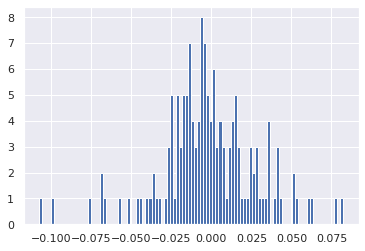

In [ ]:
import seaborn as sns
sns.set()

df.Daily_Change.hist(bins=100)

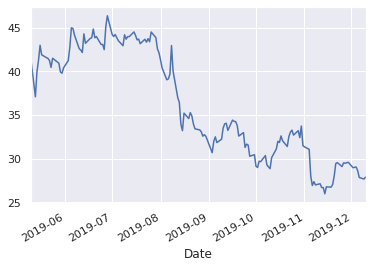

In [ ]:
df.Close.plot()

### <a name='a7'></a> Filtrowanie danych

In [ ]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.0600,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.0800,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.960,36.8500,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.9500,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.2500,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2019-12-04,29.10,29.200,28.7000,29.06,22526474,29.080,29.02,0.001378
2019-12-05,28.94,28.990,28.1800,28.65,22567274,28.795,29.06,-0.014109
2019-12-06,28.40,28.925,27.8001,27.86,33144371,28.130,28.65,-0.027574


In [ ]:
df_positive = df[df.Daily_Change > 0]
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.310,39.960,36.850,39.96,46661147,39.1350,37.10,0.077089
2019-05-15,39.370,41.880,38.950,41.29,36086065,40.3300,39.96,0.033283
2019-05-16,41.480,44.060,41.250,43.00,38115524,42.2400,41.29,0.041414
2019-05-24,41.280,41.510,40.500,41.51,8786751,41.3950,40.47,0.025698
2019-05-31,41.150,41.570,39.410,40.41,23209848,40.7800,39.80,0.015327
...,...,...,...,...,...,...,...,...
2019-11-26,29.490,30.150,29.360,29.53,29590489,29.5100,29.11,0.014428
2019-11-29,29.410,29.850,29.250,29.60,8115145,29.5050,29.49,0.003730
2019-12-03,28.195,29.330,28.150,29.02,25389163,28.6075,28.98,0.001380


In [ ]:
df_positive.Daily_Change.mean()

0.02280451612165266

In [ ]:
 df_negative = df[df.Daily_Change < 0]
 df_negative

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-13,38.79,39.240,36.0800,37.10,79442420,37.945,41.57,-0.107529
2019-05-17,41.98,43.290,41.2700,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.680,39.4600,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.240,41.2500,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.280,40.5000,41.25,9089469,41.150,41.50,-0.006024
...,...,...,...,...,...,...,...,...
2019-11-27,29.42,29.590,28.8800,29.49,22421386,29.455,29.53,-0.001355
2019-12-02,29.32,29.525,28.7000,28.98,17423896,29.150,29.60,-0.020946
2019-12-05,28.94,28.990,28.1800,28.65,22567274,28.795,29.06,-0.014109


In [ ]:
 df_negative.Daily_Change.mean()

-0.021329700483015638

In [ ]:
df.Close == df.High

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15    False
2019-05-16    False
              ...  
2019-12-04    False
2019-12-05    False
2019-12-06    False
2019-12-09    False
2019-12-10    False
Length: 149, dtype: bool

In [ ]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698


In [ ]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.42,40.05,-0.076155
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.82,27.86,-0.006461


In [ ]:
df.index > '2019-11-01'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,

In [ ]:
df[df.index > '2019-11-01']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-04,31.450,31.750,30.1200,31.08,32330121,31.2650,31.37,-0.009245
2019-11-05,29.130,29.300,27.9700,28.02,52180615,28.5750,31.08,-0.098456
2019-11-06,26.060,27.550,25.5800,26.94,133569790,26.5000,28.02,-0.038544
2019-11-07,26.800,27.420,26.4500,27.38,65949472,27.0900,26.94,0.016333
2019-11-08,27.480,27.620,26.9150,27.01,45263118,27.2450,27.38,-0.013514
2019-11-11,27.030,27.210,26.2300,27.14,41445732,27.0850,27.01,0.004813
2019-11-12,27.380,27.660,26.6600,26.70,37095389,27.0400,27.14,-0.016212
2019-11-13,26.470,26.820,26.1400,26.71,34512663,26.5900,26.70,0.000375
2019-11-14,26.800,26.860,25.6650,25.99,28027875,26.3950,26.71,-0.026956


In [ ]:
df[(df.index >= '2019-11-01') & (df.index < '2019-11-15')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.410,31.50,-0.004127
2019-11-04,31.45,31.75,30.1200,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.30,27.9700,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.55,25.5800,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.62,26.9150,27.01,45263118,27.245,27.38,-0.013514
2019-11-11,27.03,27.21,26.2300,27.14,41445732,27.085,27.01,0.004813
2019-11-12,27.38,27.66,26.6600,26.70,37095389,27.040,27.14,-0.016212
2019-11-13,26.47,26.82,26.1400,26.71,34512663,26.590,26.70,0.000375


In [ ]:
df[(df.index == '2019-11-01') | (df.index == '2019-11-07')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.41,31.50,-0.004127
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.09,26.94,0.016333


In [ ]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.0600,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.0800,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.960,36.8500,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.9500,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.2500,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2019-12-04,29.10,29.200,28.7000,29.06,22526474,29.080,29.02,0.001378
2019-12-05,28.94,28.990,28.1800,28.65,22567274,28.795,29.06,-0.014109
2019-12-06,28.40,28.925,27.8001,27.86,33144371,28.130,28.65,-0.027574


In [ ]:
df[df.index.month == 5]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.0600,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.0800,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.8500,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.9500,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.2500,43.00,38115524,42.240,41.29,0.041414
2019-05-17,41.98,43.29,41.2700,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.68,39.4600,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.24,41.2500,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.28,40.5000,41.25,9089469,41.150,41.50,-0.006024


In [ ]:
df[df.index.day == 1]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-07-01,46.98,47.0400,44.0600,44.27,17739998,45.625,46.38,-0.045494
2019-08-01,42.14,42.5355,41.0000,41.31,7349740,41.725,42.14,-0.019696
2019-10-01,30.37,30.5100,28.6500,29.15,13448055,29.760,30.47,-0.043321
2019-11-01,31.45,31.7000,30.7412,31.37,10460430,31.410,31.50,-0.004127
